<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [294]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovateable:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [689]:
# Load the data
house = pd.read_csv('./housing.csv')

In [690]:
# A:  Performing data cleaning, feature engineering and EDA 
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [691]:
house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [692]:
house2 = house.loc[house['MSZoning']!='C (all)']

In [693]:
house2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1191.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1371.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,731.364138,56.903448,70.052897,10523.831724,6.114483,5.582069,1971.593103,1985.049655,104.404300,445.162759,46.870345,567.375862,1059.408966,1164.773103,347.394483,5.531034,1517.698621,0.427586,0.057241,1.568966,0.384828,2.870345,1.046207,6.522069,0.616552,1978.627279,1.770345,473.277931,94.826897,46.537931,21.536552,3.433103,15.096552,2.777931,43.365517,6.312414,2007.812414,181654.942069
std,421.554345,42.265033,24.301013,10012.185355,1.372860,1.107330,30.022696,20.552319,181.486539,456.353871,161.828458,442.584978,439.207322,386.646095,437.094261,46.932966,525.154207,0.519394,0.238249,0.549549,0.503450,0.814645,0.219643,1.625324,0.644991,24.592779,0.745136,212.687621,125.560863,65.222761,60.838826,29.416948,55.893399,40.315051,497.636495,2.698244,1.326321,79176.485241
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,366.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.500000,0.000000,0.000000,1131.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,731.500000,50.000000,70.000000,9496.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,475.000000,992.000000,1088.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163945.000000
75%,1096.750000,70.000000,80.000000,11613.500000,7.000000,6.000000,2001.000000,2004.000000,166.750000,713.750000,0.000000,808.000000,1301.500000,1392.000000,728.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [694]:
house2.shape

(1450, 81)

In [441]:
# Attempting to find missing values.
house2.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1361
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [442]:
from pandas_summary import DataFrameSummary
dfs=DataFrameSummary(house)
dfs.summary()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,NaN,1201,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1460,1460,1460,1460,NaN,NaN,NaN,NaN,NaN,1452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1460,NaN,1460,1460,1460,NaN,NaN,NaN,NaN,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,NaN,1460,NaN,1460,NaN,NaN,1379,NaN,1460,1460,NaN,NaN,NaN,1460,1460,1460,1460,1460,1460,NaN,NaN,NaN,1460,1460,1460,NaN,NaN,1460
mean,730.5,56.8973,NaN,70.05,10516.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.09932,5.57534,1971.27,1984.87,NaN,NaN,NaN,NaN,NaN,103.685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.64,NaN,46.5493,567.24,1057.43,NaN,NaN,NaN,NaN,1162.63,346.992,5.84452,1515.46,0.425342,0.0575342,1.56507,0.382877,2.86644,1.04658,NaN,6.51781,NaN,0.613014,NaN,NaN,1978.51,NaN,1.76712,472.98,NaN,NaN,NaN,94.2445,46.6603,21.9541,3.40959,15.061,2.7589,NaN,NaN,NaN,43.489,6.32192,2007.82,NaN,NaN,180921
std,421.61,42.3006,NaN,24.2848,9981.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383,1.1128,30.2029,20.6454,NaN,NaN,NaN,NaN,NaN,181.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098,NaN,161.319,441.867,438.705,NaN,NaN,NaN,NaN,386.588,436.528,48.6231,525.48,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.62539,NaN,0.644666,NaN,NaN,24.6897,NaN,0.747315,213.805,NaN,NaN,NaN,125.339,66.256,61.1191,29.3173,55.7574,40.1773,NaN,NaN,NaN,496.123,2.70363,1.3281,NaN,NaN,79442.5
min,1,20,NaN,21,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1872,1950,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,334,0,0,334,0,0,0,0,0,0,NaN,2,NaN,0,NaN,NaN,1900,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2006,NaN,NaN,34900
25%,365.75,20,NaN,59,7553.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1954,1967,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,223,795.75,NaN,NaN,NaN,NaN,882,0,0,1129.5,0,0,1,0,2,1,NaN,5,NaN,0,NaN,NaN,1961,NaN,1,334.5,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,NaN,NaN,129975
50%,730.5,50,NaN,69,9478.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,1973,1994,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383.5,NaN,0,477.5,991.5,NaN,NaN,NaN,NaN,1087,0,0,1464,0,0,2,0,3,1,NaN,6,NaN,1,NaN,NaN,1980,NaN,2,480,NaN,NaN,NaN,0,25,0,0,0,0,NaN,NaN,NaN,0,6,2008,NaN,NaN,163000
75%,1095.25,70,NaN,80,11601.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6,2000,2004,NaN,NaN,NaN,NaN,NaN,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712.25,NaN,0,808,1298.25,NaN,NaN,NaN,NaN,1391.25,728,0,1776.75,1,0,2,1,3,1,NaN,7,NaN,1,NaN,NaN,2002,NaN,2,576,NaN,NaN,NaN,168,68,0,0,0,0,NaN,NaN,NaN,0,8,2009,NaN,NaN,214000
max,1460,190,NaN,313,215245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,9,2010,2010,NaN,NaN,NaN,NaN,NaN,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5644,NaN,1474,2336,6110,NaN,NaN,NaN,NaN,4692,2065,572,5642,3,2,3,2,8,3,NaN,14,NaN,3,NaN,NaN,2010,NaN,4,1418,NaN,NaN,NaN,857,547,552,508,480,738,NaN,NaN,NaN,15500,12,2010,NaN,NaN,755000
counts,1460,1460,1460,1201,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1452,1460,1460,1460,1423,1423,1422,1423,1460,1422,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,137

In [443]:
house2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 81 columns):
Id               1450 non-null int64
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1191 non-null float64
LotArea          1450 non-null int64
Street           1450 non-null object
Alley            89 non-null object
LotShape         1450 non-null object
LandContour      1450 non-null object
Utilities        1450 non-null object
LotConfig        1450 non-null object
LandSlope        1450 non-null object
Neighborhood     1450 non-null object
Condition1       1450 non-null object
Condition2       1450 non-null object
BldgType         1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
RoofMatl         1450 non-null object
Exterior1st      1450 non-n

In [444]:
# My goal here is to return only the rows which have null values. 

null_data = house[house.isnull().any(axis=1)]
null_data



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [711]:
# I need to investigate the null values first. For example it looks like Pandas 
# has interpreted 'NA' (meaning 'No Alley Access') as NaN.  
# I'm going to change them back, but I'm going to use NoAlAc to avoid confusion.

house2.Alley=['Grvl' if x=='Grvl' else 'Pave' if x=='Pave' else 'NoAlAc' for x in house2.Alley.values]

#All properties with NaN values for FireplaceQu also report having 0 fireplaces. So I'm just going to replace the 
# NaNs with 'NoFP' to avoid confusion

house2.loc[house2.FireplaceQu.isnull(),'FireplaceQu']='NoFP'

/Users/jamesliounis/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/jamesliounis/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [712]:
# Negative Square Feet for Second: 

house[house['2ndFlrSF'] < 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


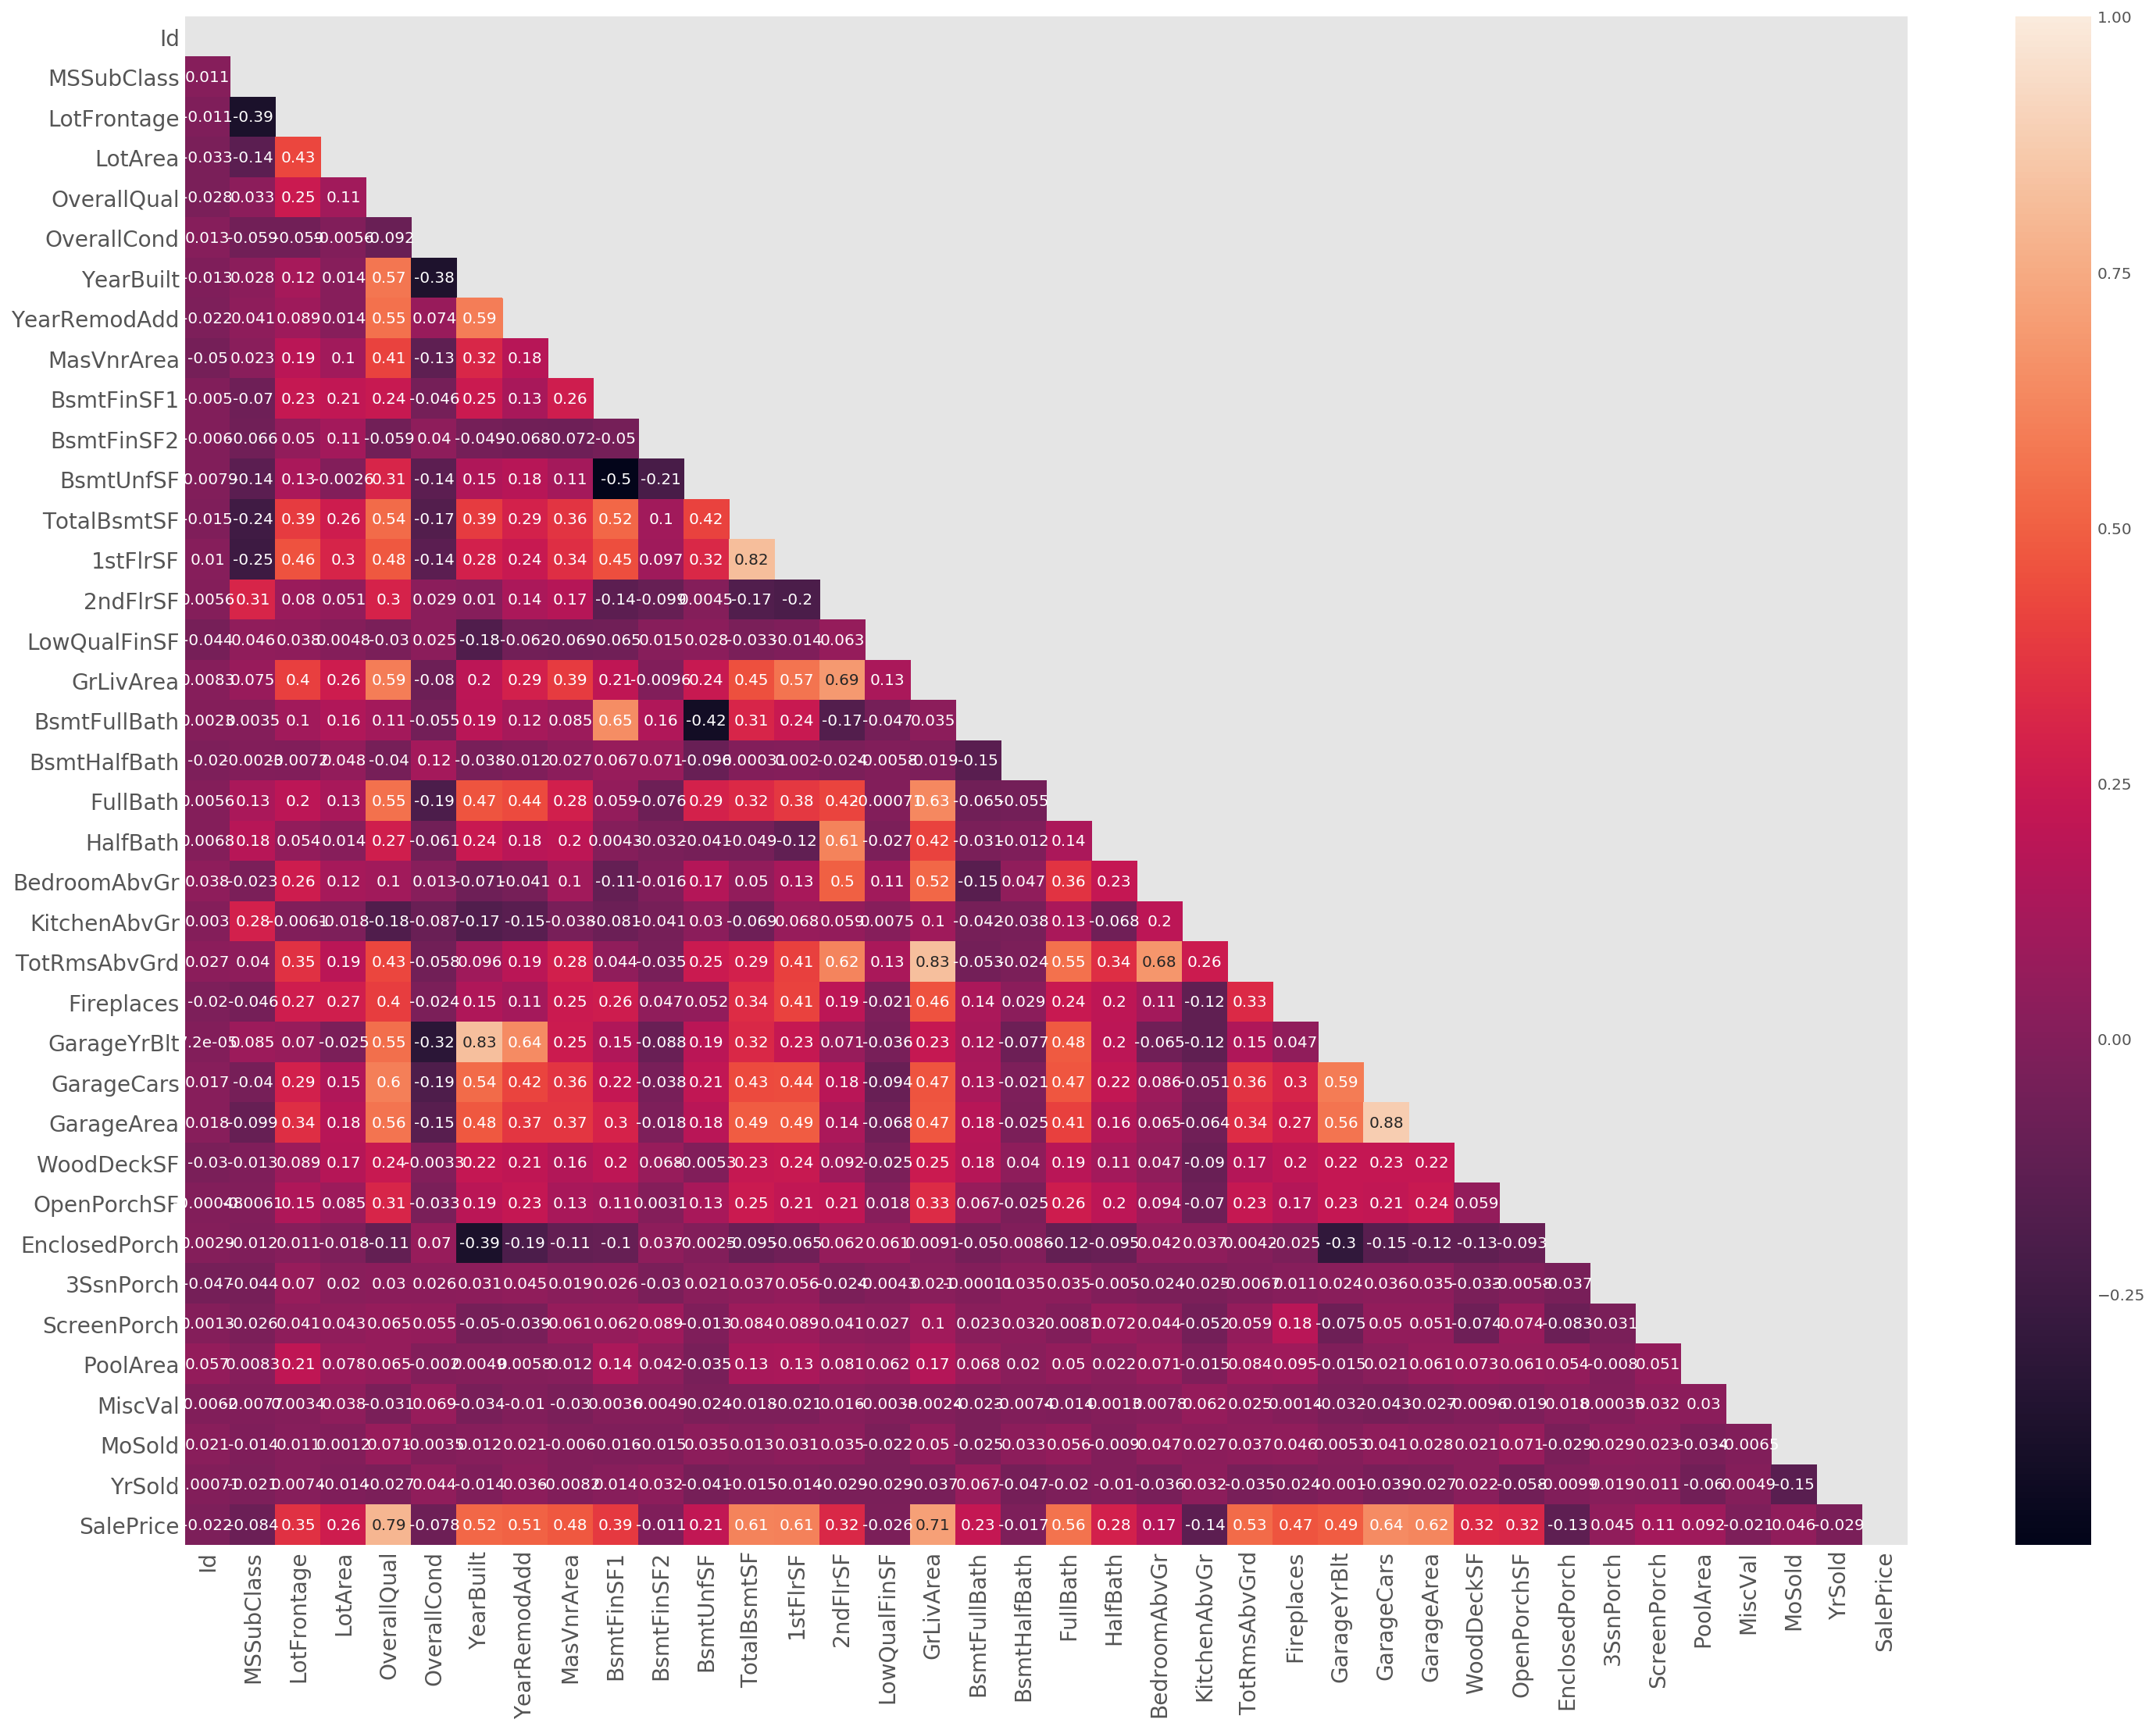

In [447]:
# I find it pertinent to use a heatmap in order to determine which variables are important in order to establish the price:


fig, ax = plt.subplots(figsize=(22,18))

mask = np.zeros_like(house_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(house_corr, mask=mask, ax=ax, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)


plt.show()

# We can see that the heatmap here is not very helpful because the data is too rich.

In [500]:
BsmtQual = house2.loc[:,['SalePrice','BsmtQual']]
BsmtQual.isnull().sum()


# After investigation a null value here just means that there is no basement.

SalePrice     0
BsmtQual     37
dtype: int64

In [504]:
BsmtQual = pd.get_dummies(BsmtQual)
Bsmt_Qual_corr = BsmtQual.corr()

Bsmt_Qual_corr

,SalePrice,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
SalePrice,1.000000,0.554251,-0.131072,0.229033,-0.447009
BsmtQual_Ex,0.554251,1.000000,-0.047455,-0.260054,-0.267837
BsmtQual_Fa,-0.131072,-0.047455,1.000000,-0.135547,-0.139603
BsmtQual_Gd,0.229033,-0.260054,-0.135547,1.000000,-0.765020
BsmtQual_TA,-0.447009,-0.267837,-0.139603,-0.765020,1.000000


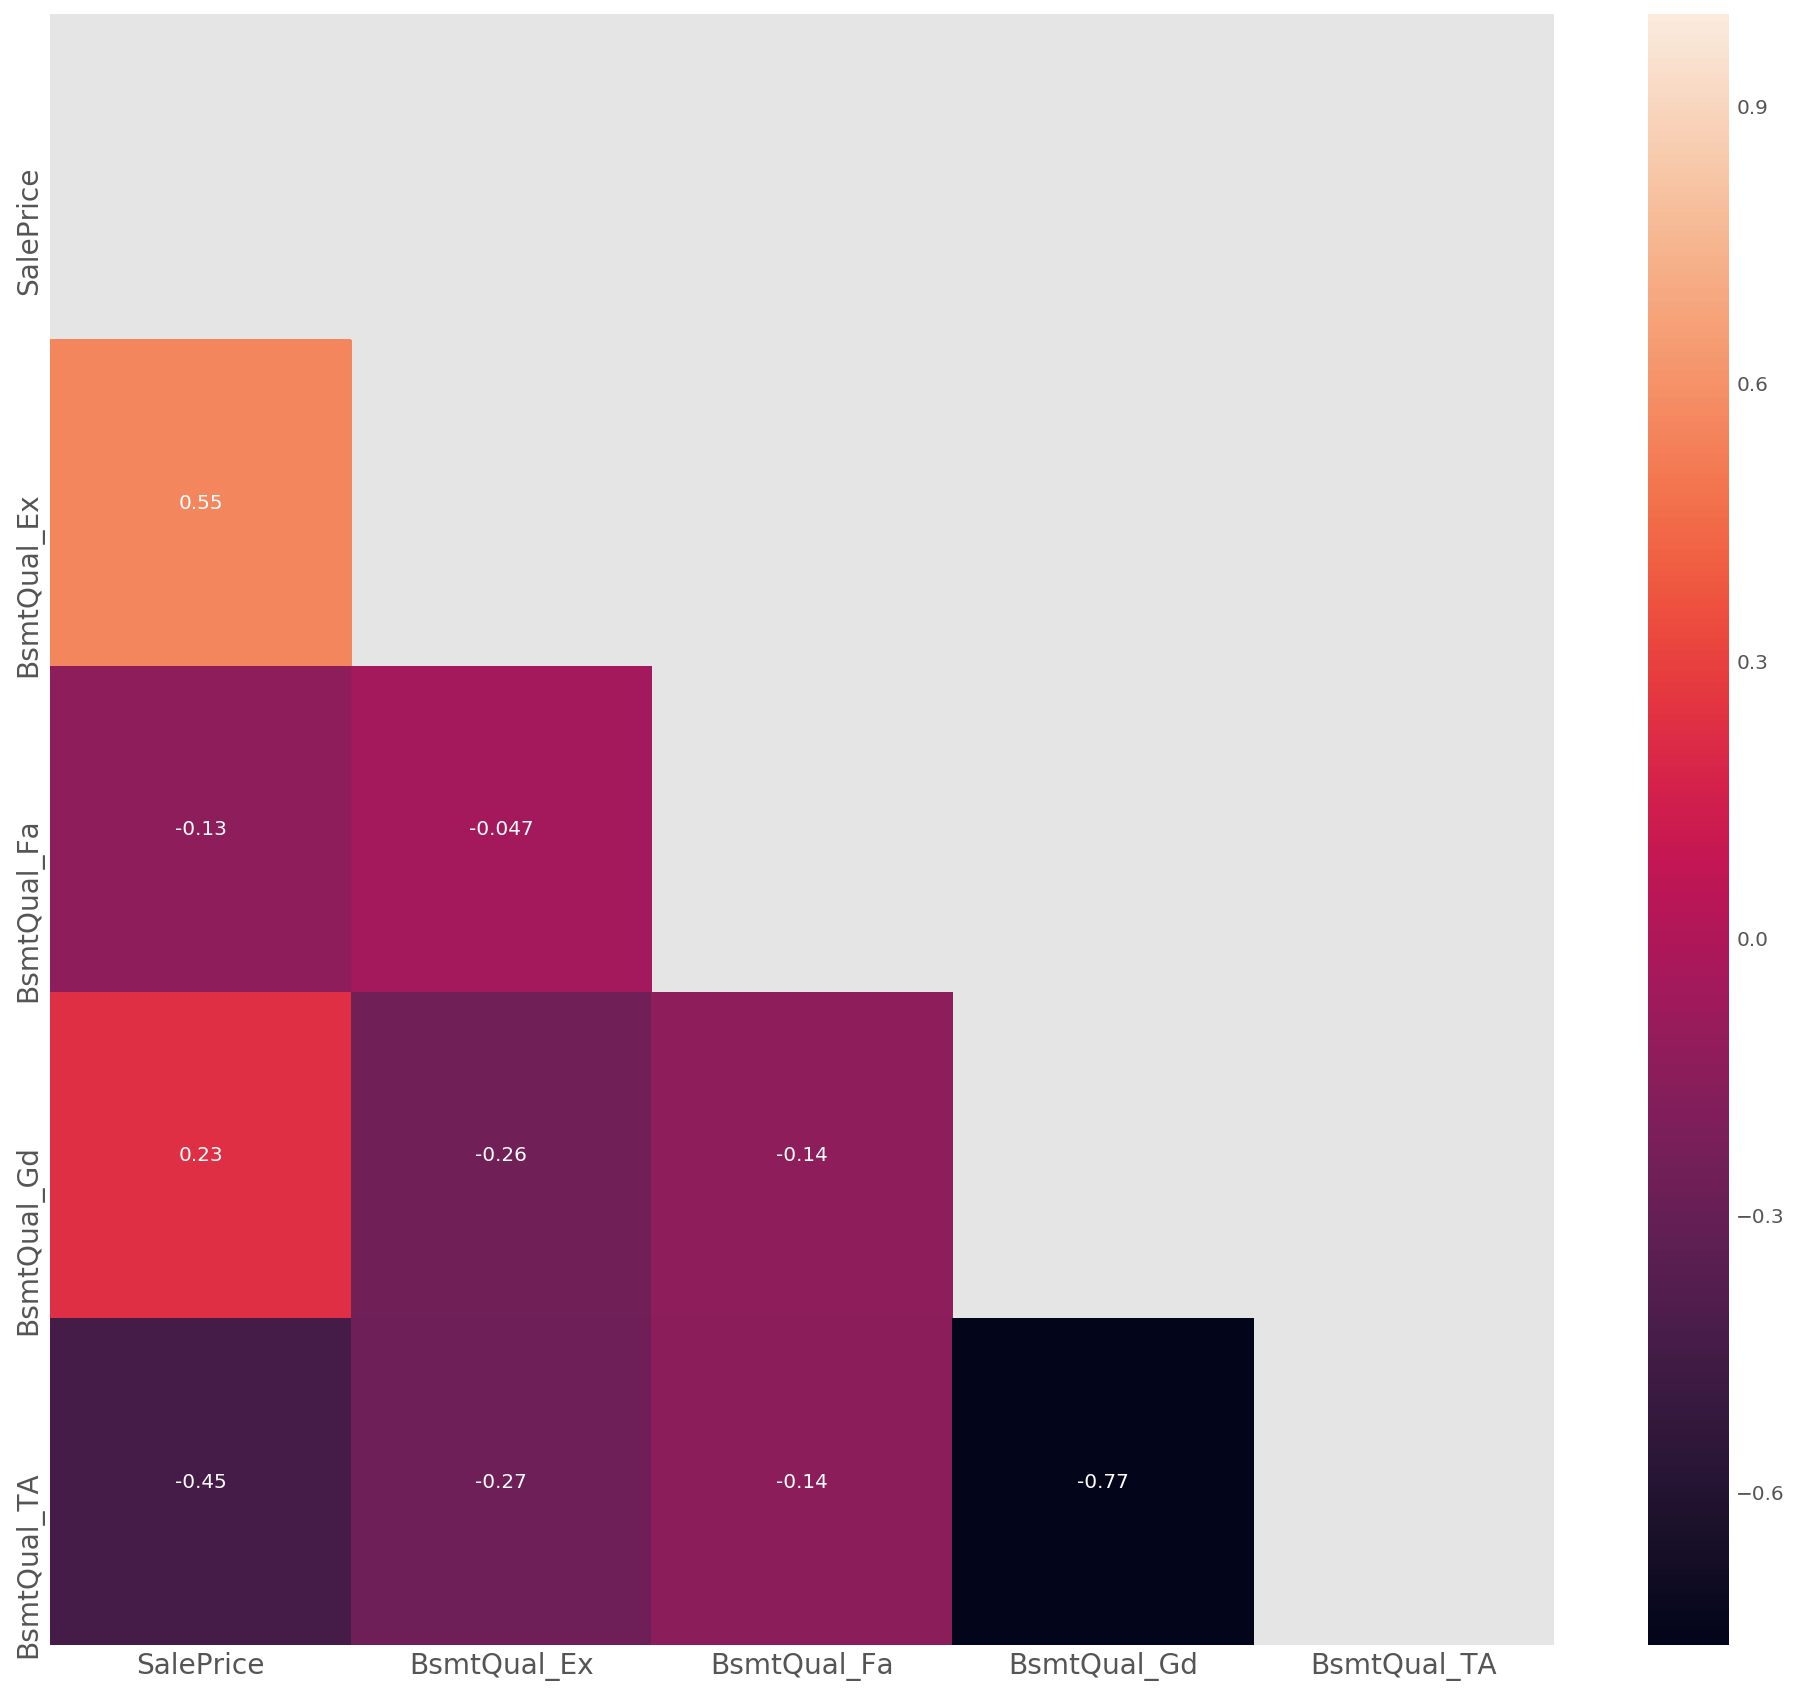

In [524]:
# Plotting a heatmap for the basement correlation matrix

fig, ax = plt.subplots(figsize=(15,15))

mask = np.zeros_like(Bsmt_Qual_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(Bsmt_Qual_corr, mask=mask, ax=ax, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)


plt.show()

In [511]:
neigh = house2.loc[:,['SalePrice','Neighborhood']]
neigh = pd.get_dummies(neigh)
neigh_corr = neigh.corr()

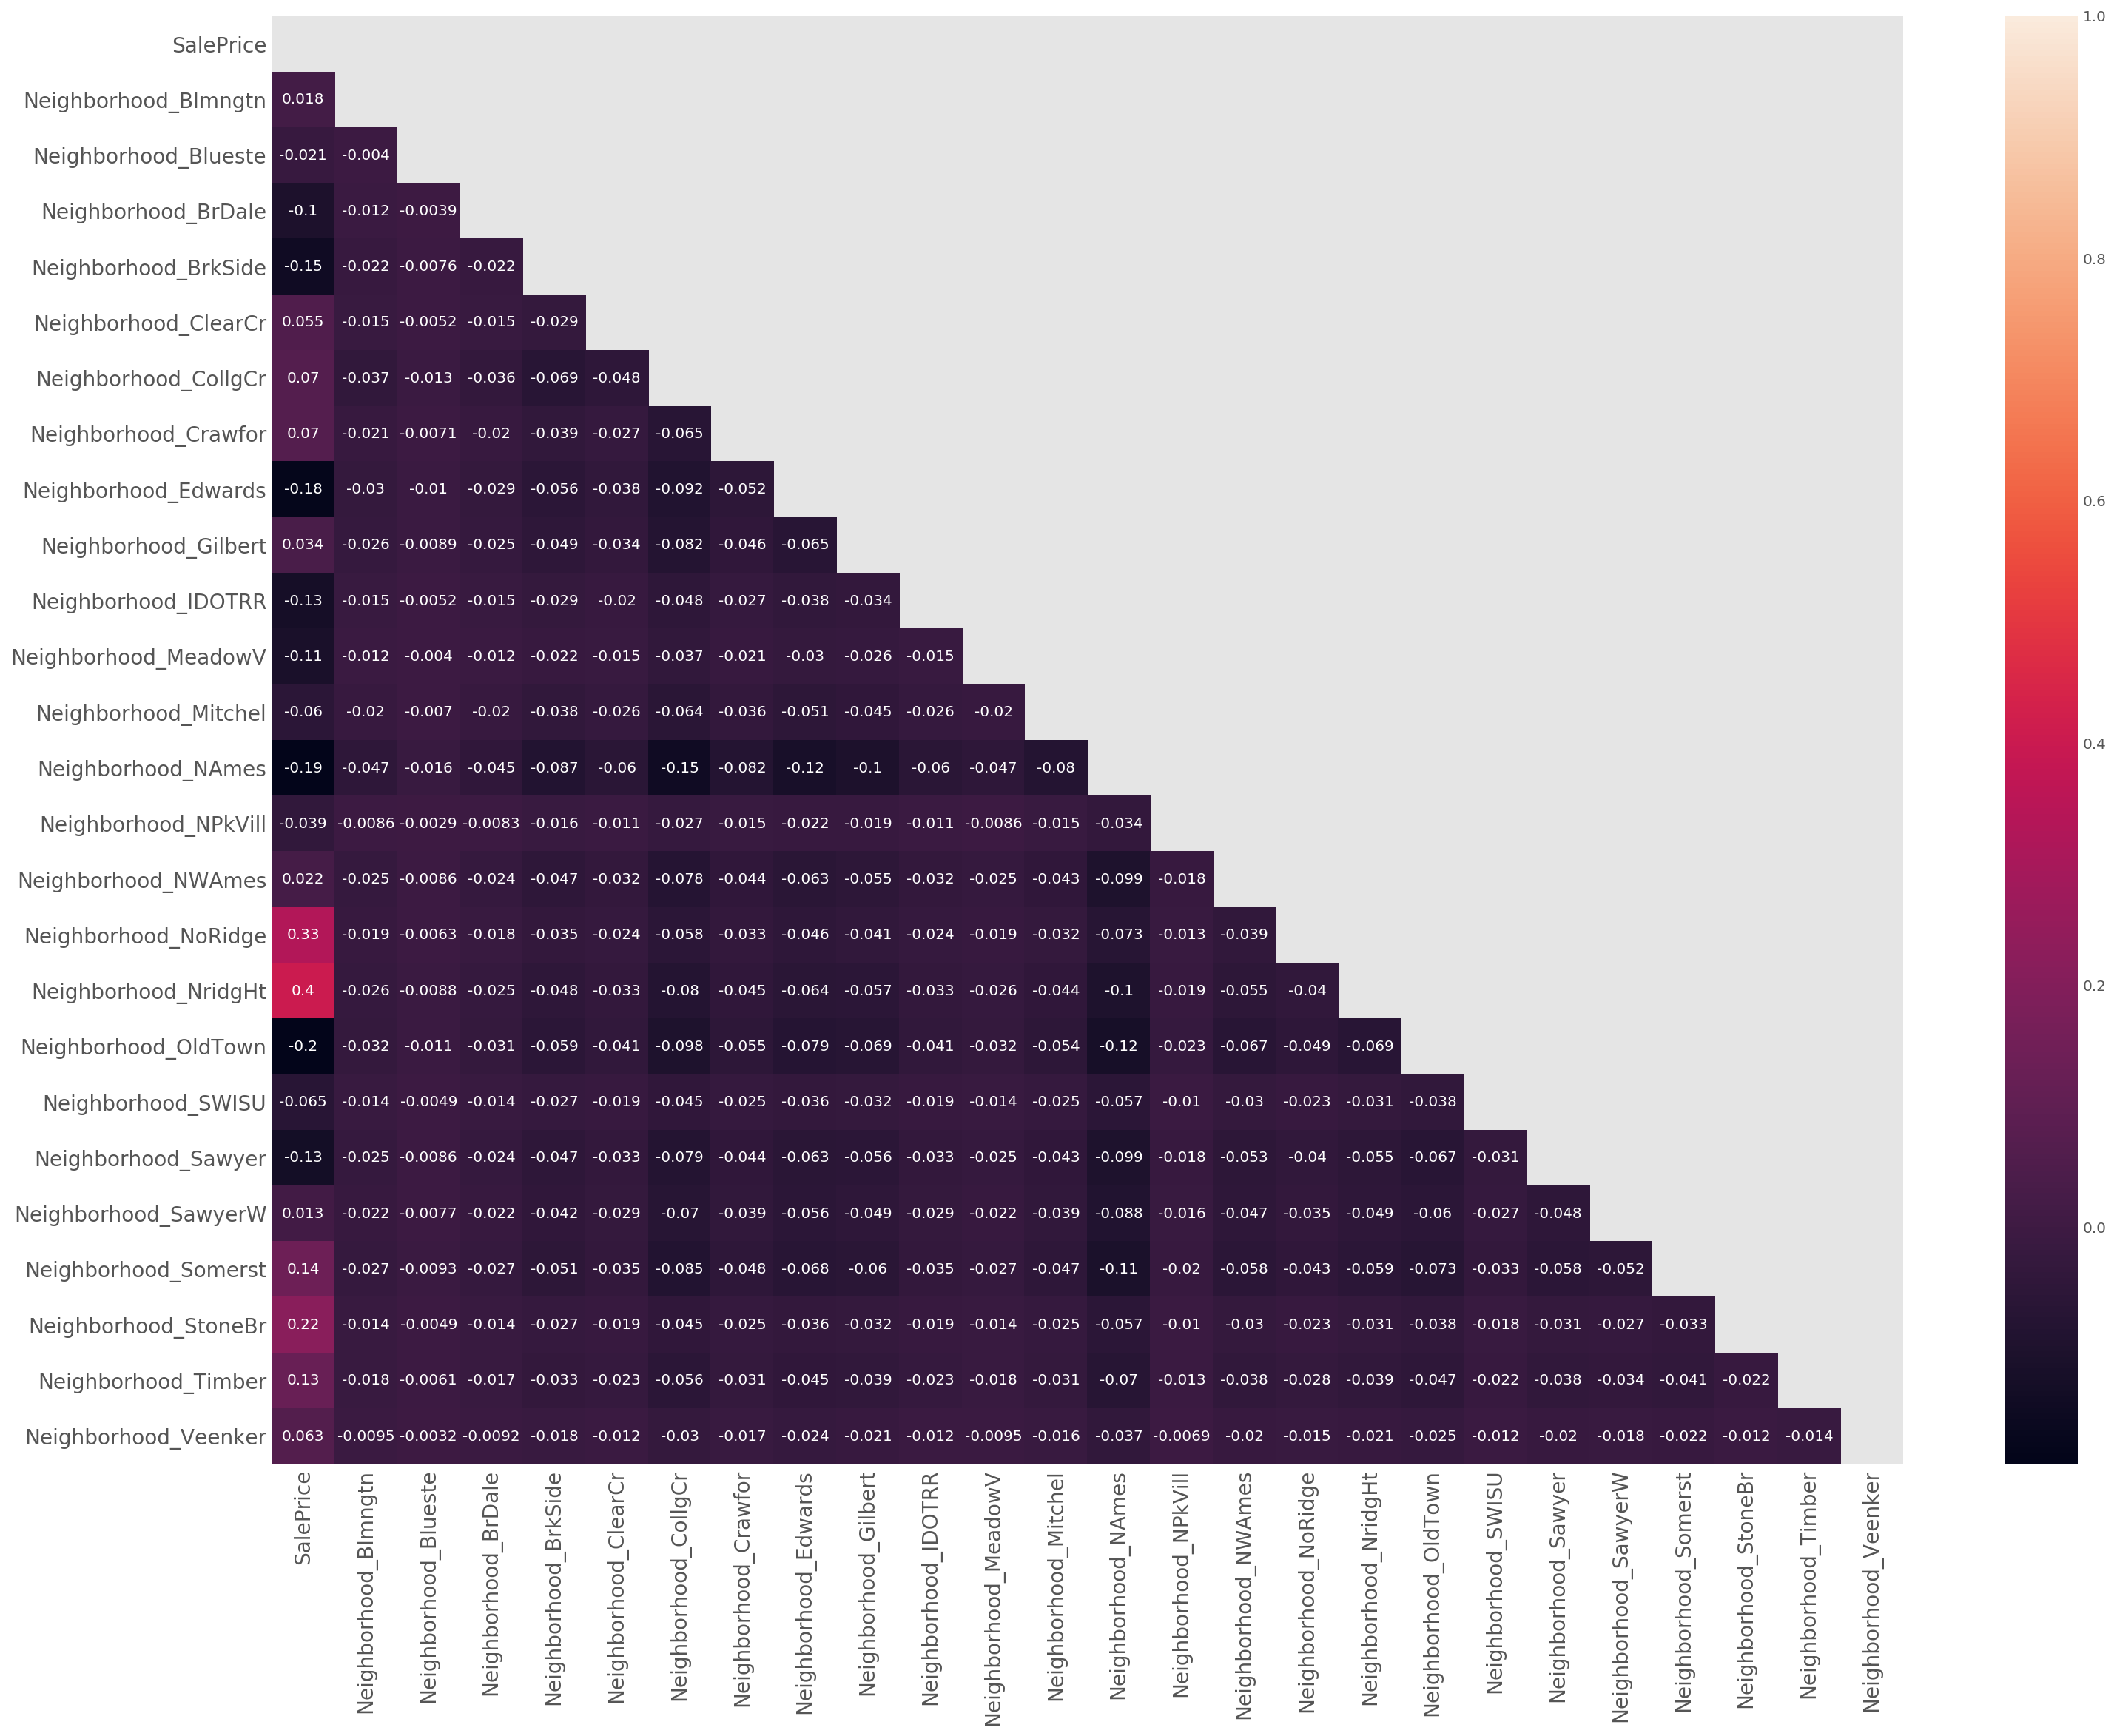

In [512]:
fig, ax = plt.subplots(figsize=(22,18))

mask = np.zeros_like(neigh_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(neigh_corr, mask=mask, ax=ax, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)


plt.show()

In [448]:
# Investigating if there are houses that are less than $1

house[house['SalePrice'] < 1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [449]:
# Negative Square Feet:

house[house['1stFlrSF'] < 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [450]:
# Another approach is to use a mask on the correlation matrix to see which variables have the highest correlation:

strong_corr = house_corr.loc[(house_corr['SalePrice']>0.7)|(house_corr['SalePrice']<-0.7)]

strong_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.486362,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [451]:
# Calculate baseline accuracy:

house2['SalePrice'].value_counts().max()/len(house)

0.013698630136986301

In [452]:
from sklearn.model_selection import cross_val_score,cross_val_predict, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge

In [608]:
# Based on the correlation matrix and the heatmap above, I am now able to build my predictor matrix with the 
# following 8 predictors that I chose:

#X = house2[['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
#       'BedroomAbvGr', 'TotRmsAbvGrd', 'BsmtFullBath',
#       'GarageArea']]
X = pd.merge(house2[['LotArea', 'TotalBsmtSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'BsmtFullBath',
       'GarageArea']],neigh,how='outer',left_index=True,right_index=True)
X_1 = pd.merge(X,BsmtQual,how='outer',left_index=True,right_index=True)

y = house2['SalePrice']

In [617]:
X_1 = pd.get_dummies(X_1,drop_first=True)

In [610]:
X_1.isnull().sum()

LotArea                 0
TotalBsmtSF             0
GrLivArea               0
BedroomAbvGr            0
TotRmsAbvGrd            0
BsmtFullBath            0
GarageArea              0
SalePrice_x             0
Neighborhood_Blmngtn    0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
SalePrice_y             0
BsmtQual_Ex             0
BsmtQual_Fa             0
BsmtQual_Gd             0
BsmtQual_TA             0
dtype: int64

In [611]:
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1,y,
                                        test_size=0.33,
                                        random_state=5)

In [612]:
ss = StandardScaler()
ss.fit(X_1_train) 
X_1_train_ss = ss.transform(X_1_train) 
X_test_ss = ss.transform(X_1_test)



In [613]:
# Tying to find the best linear regression model with my training data:

lnr = LinearRegression()
cross_val_score(lnr,X_1_train_ss,y_train,cv=3)

array([ 1.,  1.,  1.])

In [614]:
#I'm going to try to imporove with regularization (Ridge) 
alpha_vals = np.logspace(-3,3,50)
ridge_cv = RidgeCV(alphas = alpha_vals, cv=3)
ridge_cv.fit(X_train_ss,y_train)
best_alpha = ridge_cv.alpha_
print('Best alpha:',best_alpha)

Best alpha: 4.71486636346


In [615]:
best_ridge = Ridge(alpha=best_alpha)
cross_val_score(best_ridge,X_train_ss,y_train,cv=3)

array([ 0.5091555 ,  0.57677501,  0.52230795])

In [640]:
#ridge_cv.score(X_test_ss,y_test)

In [589]:
#find the predictions and store them in my dataframe
#make a plot to visualise my predictions vs my true categories
#evaluate feature importance by finding the coefficients of my model 

X_test = X_test.copy()
X_test['true_price'] = y_test
X_test['predicted_price'] = ridge_cv.predict(X_test_ss)
X_test.head()

,LowQualFinSF,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFP,FireplaceQu_Po,FireplaceQu_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,true_price,predicted_price
856,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,147000,147000.051929
1016,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,203000,203000.014476
1420,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,179900,179899.940877
854,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,170000,170000.113119
1132,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,117500,117500.138534


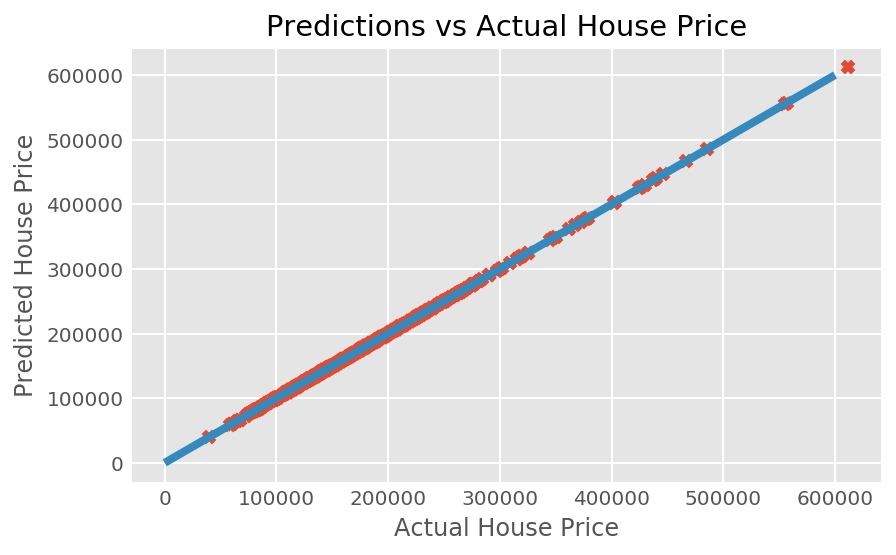

In [590]:
#plotting my true level versus predicted level:
_ = plt.plot(X_test['true_price'],
             X_test['predicted_price'],
             linestyle='None',
             marker='X');
_ = plt.xlabel('Actual House Price')
_ = plt.ylabel('Predicted House Price')
_ = plt.title('Predictions vs Actual House Price')
_ = plt.plot([0,600000],[0,600000])
plt.show()


# After observing the following plot, and the ridge_cv score, it seems obvious that there is a mistake in the model. 

In [592]:
#feature importance, as determined by Ridge model
#what the coefficients are for the plain Linear Regression
coefficients = pd.DataFrame()
coefficients['variable'] = X_1_train.columns
coefficients['coef'] = ridge_cv.coef_
coefficients['abs_coef'] = np.abs(ridge_cv.coef_)
coefficients.sort_values('abs_coef',ascending=False,inplace=True)
coefficients

,variable,coef,abs_coef
7,SalePrice_x,39730.636321,39730.636321
33,SalePrice_y,39730.636316,39730.636316
2,GrLivArea,0.116068,0.116068
34,BsmtQual_Ex,0.044966,0.044966
1,TotalBsmtSF,0.034464,0.034464
23,Neighborhood_NoRidge,0.030067,0.030067
6,GarageArea,0.029825,0.029825
24,Neighborhood_NridgHt,0.029661,0.029661
25,Neighborhood_OldTown,-0.024552,0.024552
30,Neighborhood_StoneBr,0.024014,0.024014


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovatable features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [725]:
# In order to find the following variables, I used once again the same heatmap that I used earlier, just extracting 
# highly correlated unfixed characteristics this time:


In [705]:
# A: In order to evaluate the effect in dollars of the renovatable features, I have to reproduce a linear regression
# but this time using unfixed caracteristics:

change = house2[['Heating','KitchenQual','FireplaceQu','PavedDrive','Fence','MiscFeature','LowQualFinSF','ExterCond','Alley','OverallQual','OverallCond','RoofStyle','Exterior1st','Exterior2nd']]
change.head()

,Heating,KitchenQual,FireplaceQu,PavedDrive,Fence,MiscFeature,LowQualFinSF,ExterCond,Alley,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd
0,GasA,Gd,NaN,Y,NoFP,None,0,TA,NaN,7,5,Gable,VinylSd,VinylSd
1,GasA,TA,TA,Y,NoFP,None,0,TA,NaN,6,8,Gable,MetalSd,MetalSd
2,GasA,Gd,TA,Y,NoFP,None,0,TA,NaN,7,5,Gable,VinylSd,VinylSd
3,GasA,Gd,Gd,Y,NoFP,None,0,TA,NaN,7,5,Gable,Wd Sdng,Wd Shng
4,GasA,Gd,TA,Y,NoFP,None,0,TA,NaN,8,5,Gable,VinylSd,VinylSd


In [622]:
change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 14 columns):
Heating         1450 non-null object
KitchenQual     1450 non-null object
FireplaceQu     1450 non-null object
PavedDrive      1450 non-null object
Fence           278 non-null object
MiscFeature     52 non-null object
LowQualFinSF    1450 non-null int64
ExterCond       1450 non-null object
Alley           1450 non-null object
OverallQual     1450 non-null int64
OverallCond     1450 non-null int64
RoofStyle       1450 non-null object
Exterior1st     1450 non-null object
Exterior2nd     1450 non-null object
dtypes: int64(3), object(11)
memory usage: 209.9+ KB


In [709]:
# Dealing with the missing values


house2.loc[house2.Fence.isnull(),'Fence']='NoFence'

house2.loc[house2.MiscFeature.isnull(),'MiscFeature']='None'

#house2.Fence=[x=='NoFence' if x == np.nan for x in house2.Fence.values]


#house2.Alley=['Grvl' if x=='Grvl' else 'Pave' if x=='Pave' else 'NoAlAc' for x in house2.Alley.values]

/Users/jamesliounis/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [713]:
change.isnull().sum()

Heating            0
KitchenQual        0
FireplaceQu      681
PavedDrive         0
Fence              0
MiscFeature        0
LowQualFinSF       0
ExterCond          0
Alley           1361
OverallQual        0
OverallCond        0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
dtype: int64

In [714]:
X = change

y = house2['SalePrice']


In [727]:
X = pd.get_dummies(X,drop_first=True)



In [716]:
X.isnull().sum()

LowQualFinSF           0
OverallQual            0
OverallCond            0
Heating_GasA           0
Heating_GasW           0
Heating_Grav           0
Heating_OthW           0
Heating_Wall           0
KitchenQual_Fa         0
KitchenQual_Gd         0
KitchenQual_TA         0
FireplaceQu_Fa         0
FireplaceQu_Gd         0
FireplaceQu_Po         0
FireplaceQu_TA         0
PavedDrive_P           0
PavedDrive_Y           0
Fence_GdWo             0
Fence_MnPrv            0
Fence_MnWw             0
Fence_NoFP             0
MiscFeature_None       0
MiscFeature_Othr       0
MiscFeature_Shed       0
MiscFeature_TenC       0
ExterCond_Fa           0
ExterCond_Gd           0
ExterCond_Po           0
ExterCond_TA           0
Alley_Pave             0
RoofStyle_Gable        0
RoofStyle_Gambrel      0
RoofStyle_Hip          0
RoofStyle_Mansard      0
RoofStyle_Shed         0
Exterior1st_AsphShn    0
Exterior1st_BrkComm    0
Exterior1st_BrkFace    0
Exterior1st_CBlock     0
Exterior1st_CemntBd    0


In [717]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        test_size=0.33,
                                        random_state=5)

In [718]:
ss = StandardScaler()
ss.fit(X_train) 
X_train_ss = ss.transform(X_train) 
X_test_ss = ss.transform(X_test)

In [719]:
alpha_vals = np.logspace(-3,3,50)
ridge_cv = RidgeCV(alphas = alpha_vals, cv=3)
ridge_cv.fit(X_train_ss,y_train)
best_alpha = ridge_cv.alpha_
print('Best alpha:',best_alpha)

Best alpha: 19.3069772888


In [720]:
best_ridge = Ridge(alpha=best_alpha)
cross_val_score(best_ridge,X_train_ss,y_train,cv=3)

array([ 0.6154177 ,  0.68585319,  0.6567352 ])

In [721]:
ridge_cv.score(X_test_ss,y_test)

0.69063396814626243

In [722]:
X_test = X_test.copy()
X_test['true_price'] = y_test
X_test['predicted_price'] = ridge_cv.predict(X_test_ss)


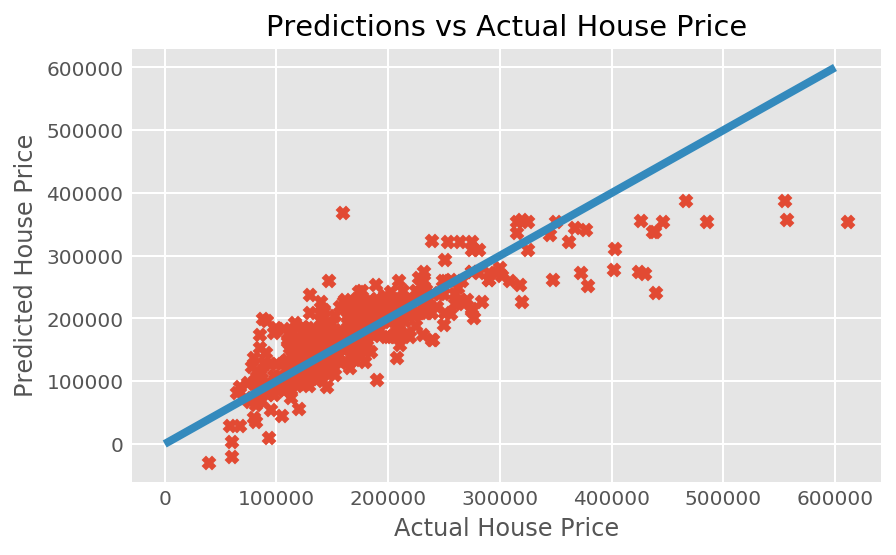

In [723]:
_ = plt.plot(X_test['true_price'],
             X_test['predicted_price'],
             linestyle='None',
             marker='X');
_ = plt.xlabel('Actual House Price')
_ = plt.ylabel('Predicted House Price')
_ = plt.title('Predictions vs Actual House Price')
_ = plt.plot([0,600000],[0,600000])
plt.show()

In [639]:
# I repeated the same steps from the previous question only this time changing the variables, using some that can 
# be changed. However, we can see with the ridge_cv score and the scatterplot that this model is not very reliable,
# and cannot be trusted. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. It is recommended to do some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [5]:
# A: